In [1]:
%matplotlib notebook 
# Import modules
import math
import numpy as np
import matplotlib.pyplot
import tables as tb

def merge(a,b):
    final = np.zeros (len(a)+len(b))
    for i in range(len(a)):
        final[2*i]   = a[i]
        final[2*i+1] = b[i]
    return final

In [18]:
#db_file = '/home/andrei2/Desktop/git/saltproc/develop/saltproc/data/db_saltproc.h5'
db_file = '/home/andrei2/Desktop/git/saltproc/test_data/tap/hardcoded/1/db_2187d.h5'
step = 3/365  # days

db = tb.open_file(db_file, mode='r')
# print(db)

sim_param = db.root.simulation_parameters
# Keff at t=0 depletion step
k_bds = np.array([x['keff_bds'][0] for x in sim_param.iterrows()])
k_bds_err = np.array([x['keff_bds'][1] for x in sim_param.iterrows()])
# Keff at t=end depletion step
k_eds = np.array([x['keff_eds'][0] for x in sim_param.iterrows()])
k_eds_err = np.array([x['keff_eds'][1] for x in sim_param.iterrows()])

days = np.array(step*np.arange(len(k_bds)))
days2 = np.arange(step, (len(k_bds)+1)*(step), step, dtype=np.float64)

db.close()



<IPython.core.display.Javascript object>


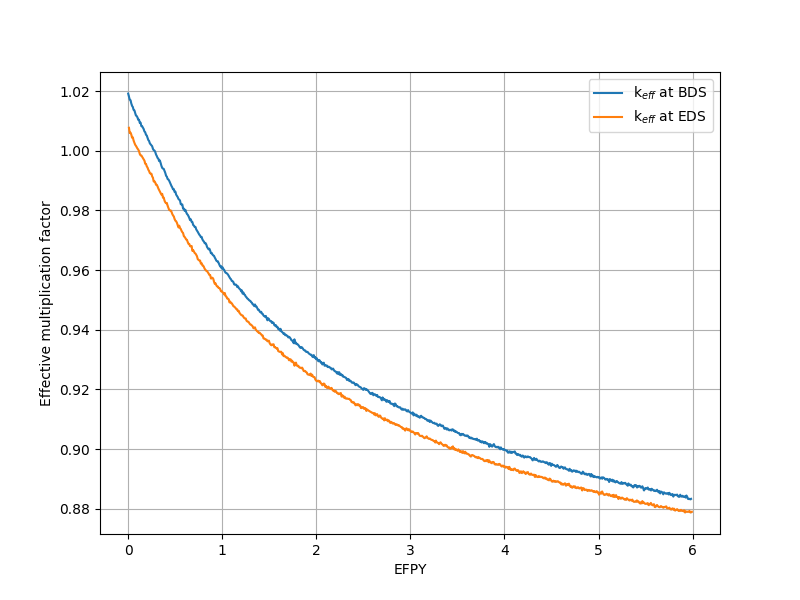

Keff drop over period 0.140159


In [21]:
# Initialize figure
fig_keff_1 = matplotlib.pyplot.figure(1, figsize=[8,6])
ax = fig_keff_1.add_subplot(111)
ax.grid(True)
ax.plot(days, k_bds, '-', label='k$_{eff}$ at BDS', linewidth=1.5)
ax.plot(days2, k_eds, '-', label='k$_{eff}$ at EDS', linewidth=1.5)

ax.fill_between(days, k_bds-k_bds_err, k_bds+k_bds_err, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)
ax.fill_between(days2, k_eds-k_eds_err, k_eds+k_eds_err, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)

ax.legend(loc=0)
ax.set_ylabel('Effective multiplication factor')
#ax.set_xlabel('EFPD')
ax.set_xlabel('EFPY')
#ax.set_title('Multiplication factor for online reprocessing case ' + str(EOS) +' days')
#ax.set_xlim([5830,5850])
#ax.set_ylim([1.05, 1.06])
fig_keff_1.show()
#fig_keff_1.savefig('../../../saltproc/examples/gallery/full_core/keff.png',bbox_inches='tight', dpi=700)
#fig_keff_1.savefig('/home/andrei2/Desktop/git/publications/msbr-reproc/figures/keff_rem_cases.png',bbox_inches='tight', dpi=700)
print("Keff drop over period %f" %(k_bds[0]-k_eds[-1]))

729 729
[ 0.          0.00821918  0.00821918 ...,  5.98356164  5.98356164
  5.99178082]
[ 1.01915002  1.00768995  1.01815999 ...,  0.878869    0.88332599
  0.87899101]
[ 0.0002  0.0002  0.0002 ...,  0.0002  0.0002  0.0002]


<IPython.core.display.Javascript object>


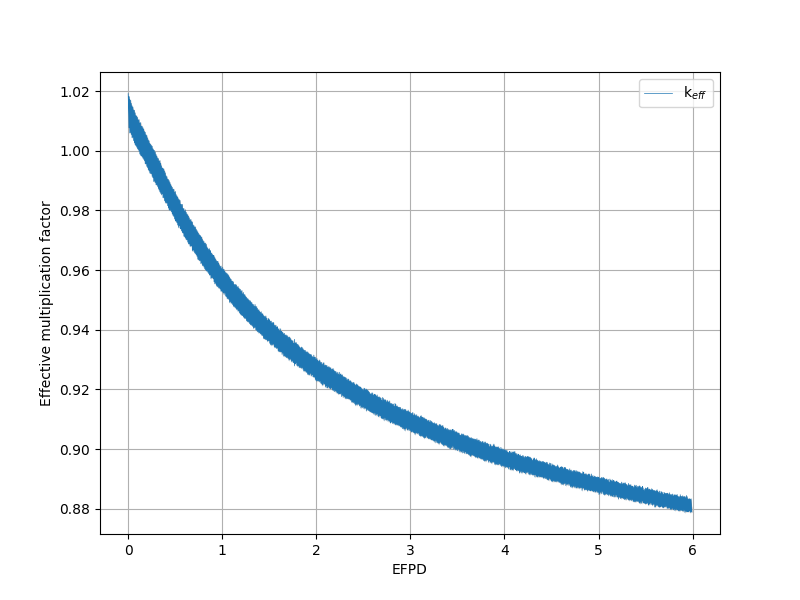

In [24]:
keff = merge(k_bds, k_eds)
efpd = merge(days, days2)
err = merge(k_bds_err, k_eds_err)


print(len(k_bds), len(k_eds))
print(efpd)
print(keff)
print(err)
# Initialize figure
fig_keff_2 = matplotlib.pyplot.figure(2, figsize=[8,6])
ax = fig_keff_2.add_subplot(111)
ax.grid(True)
ax.plot(efpd, keff, '-', label='k$_{eff}$', linewidth=0.5)

ax.fill_between(efpd, keff-err, keff+err, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)
#ax.fill_between(days, k_eds-k_eds_err, k_eds+k_eds_err, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)

ax.legend(loc=0)
ax.set_ylabel('Effective multiplication factor')
ax.set_xlabel('EFPD')
#ax.set_title('Multiplication factor for online reprocessing case ' + str(EOS) +' days')
#ax.set_xlim([5830,5850])
#ax.set_ylim([1.05, 1.06])
fig_keff_2.show()